In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN 
from sklearn import preprocessing

In [2]:
mall_dataset = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ML\Mall_Customers.csv")
mall_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


                                             |          | [  0%]   00:00 -> (? left)


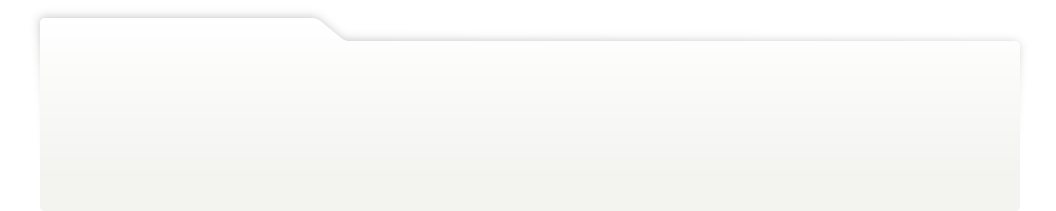
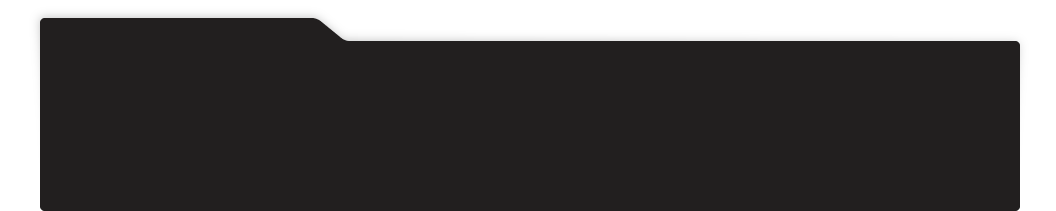
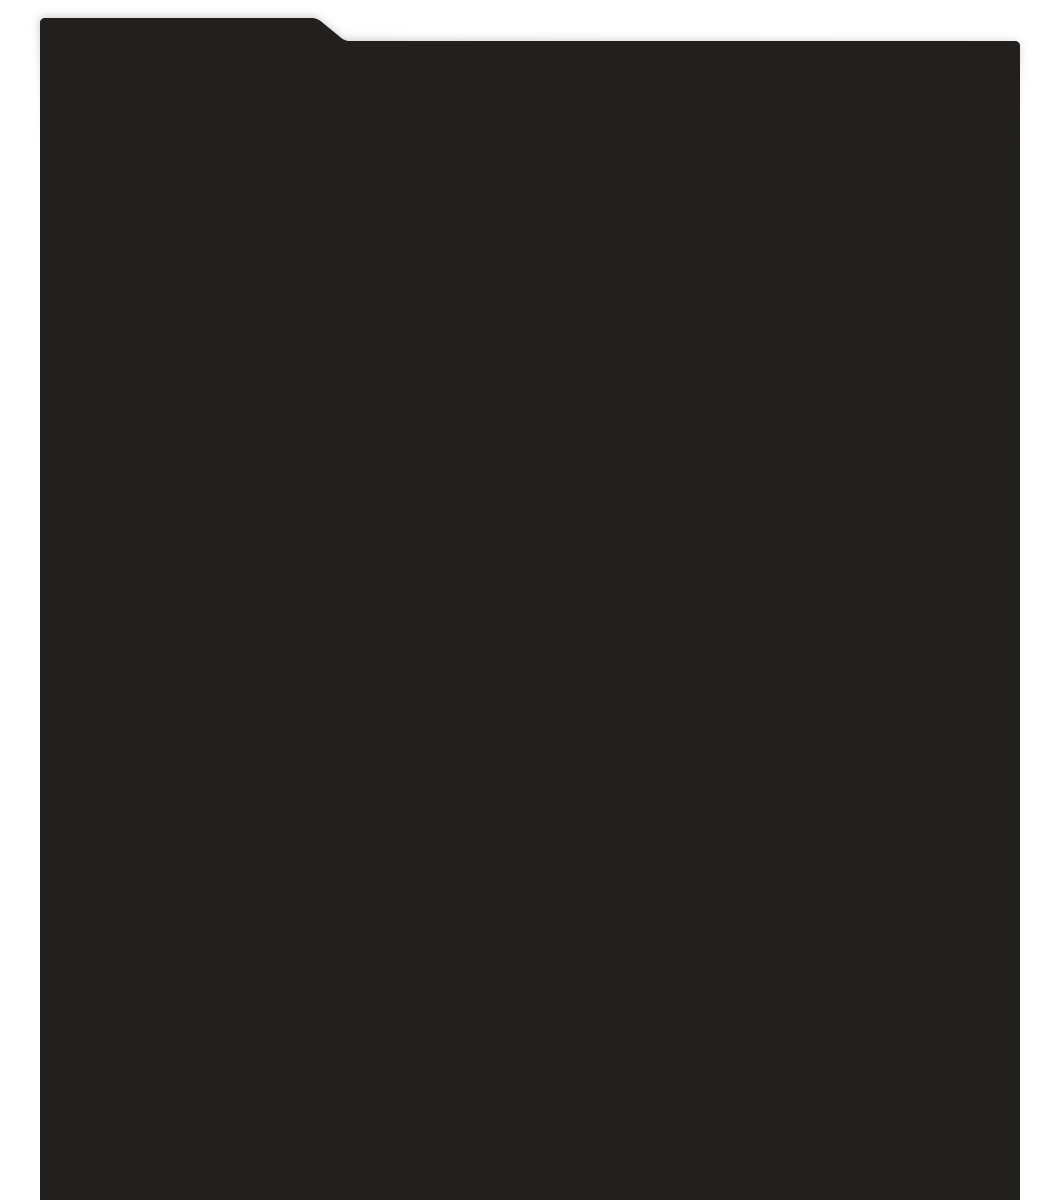
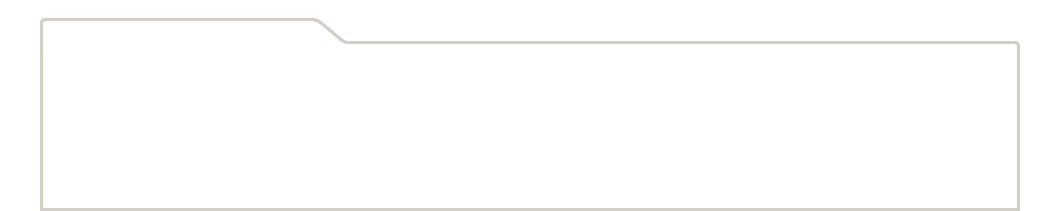
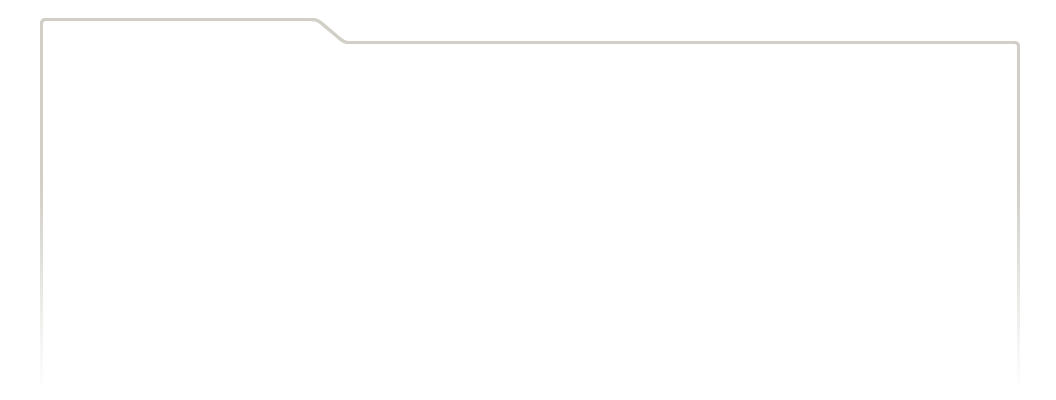
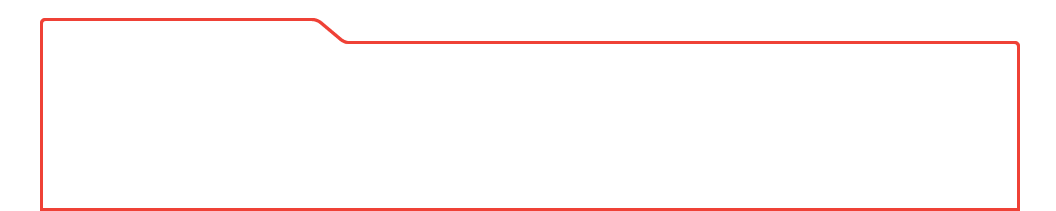
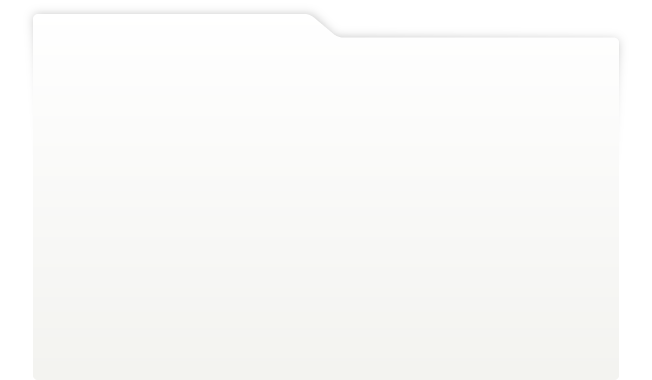
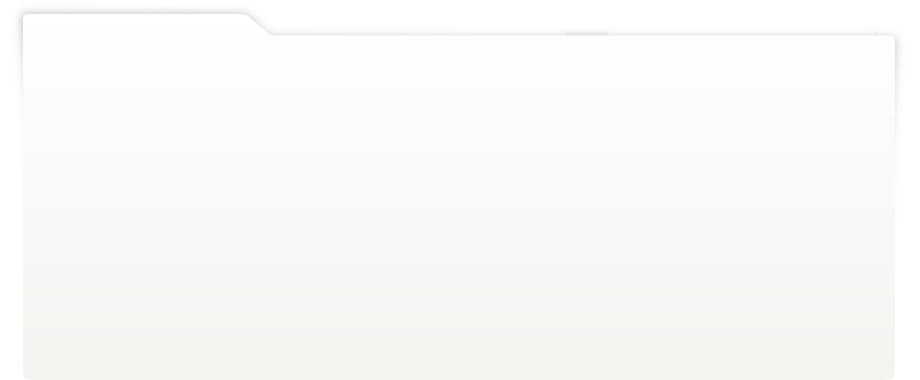
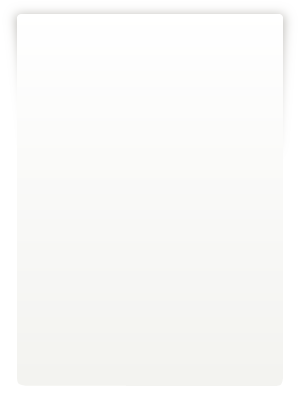
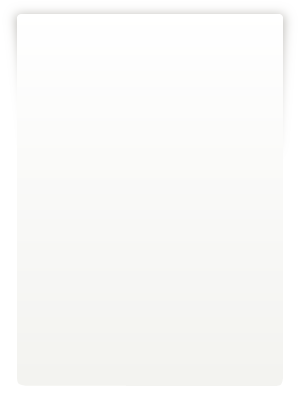
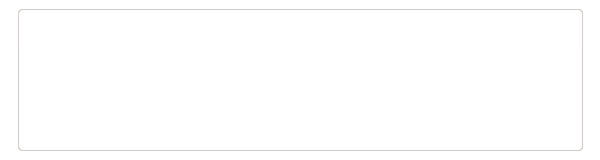
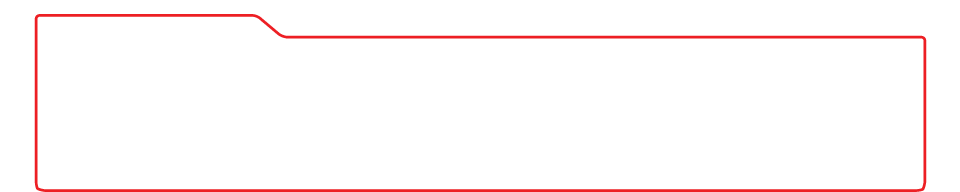
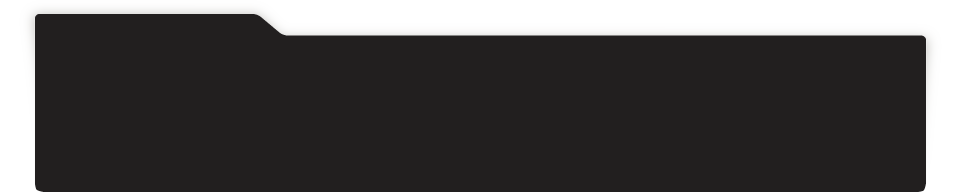
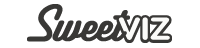
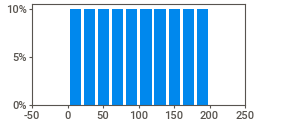
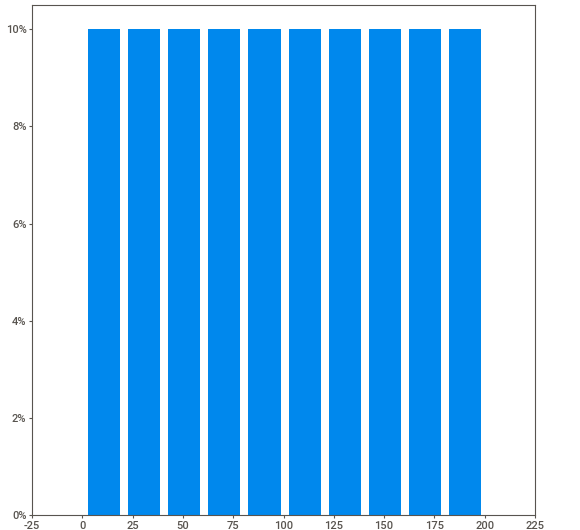
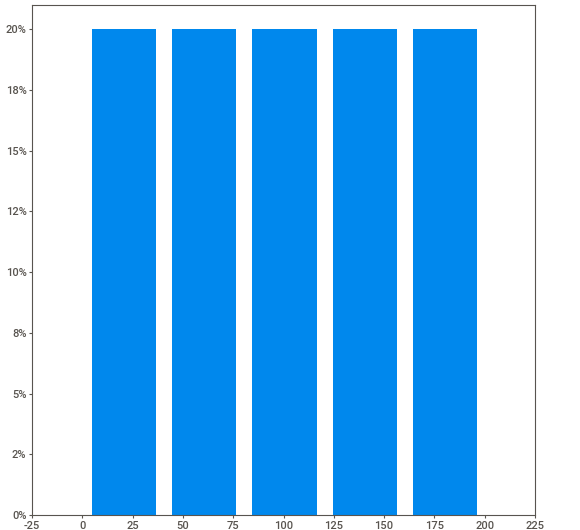
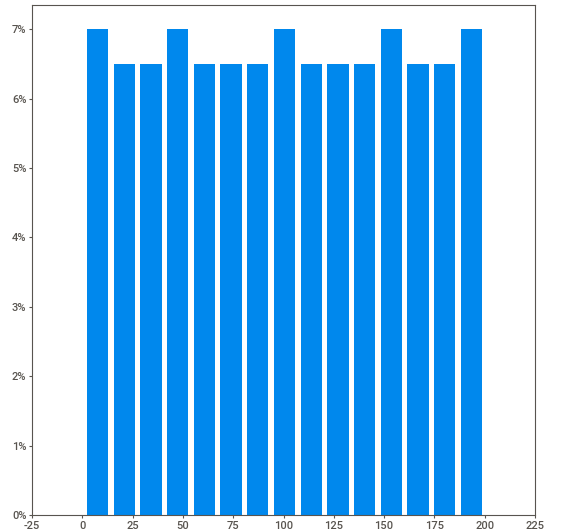
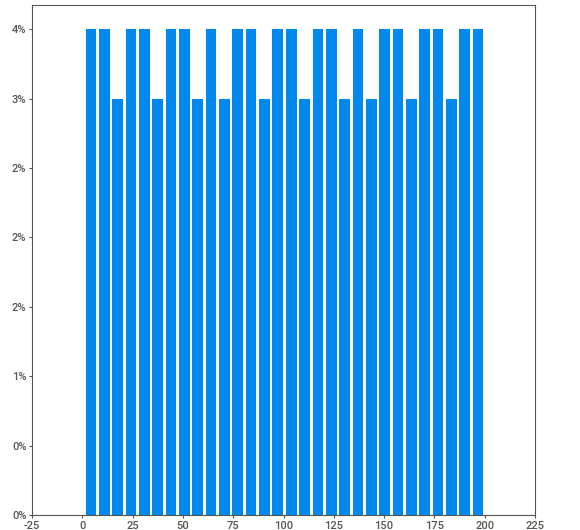
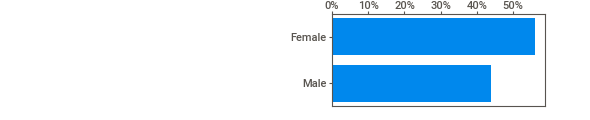
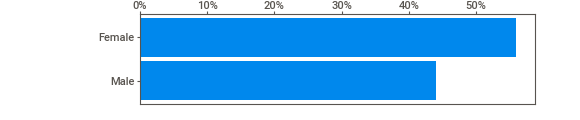
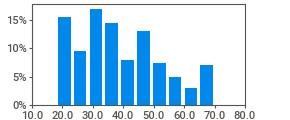
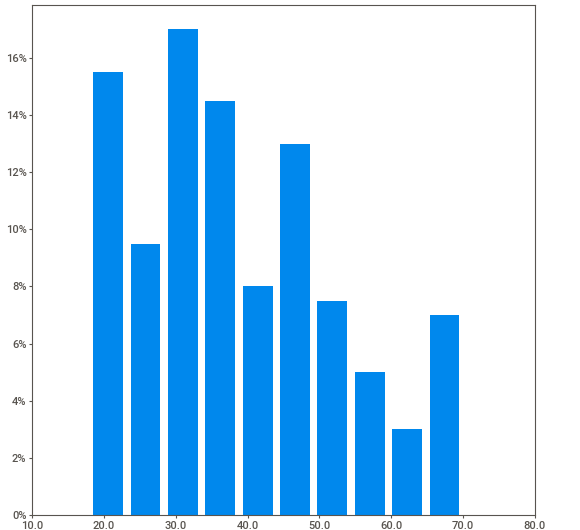
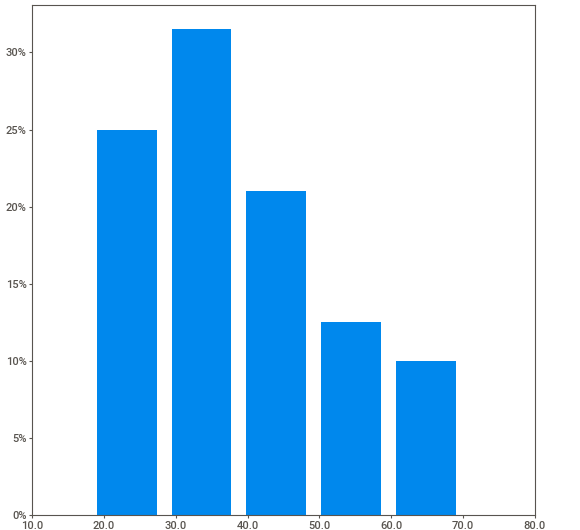
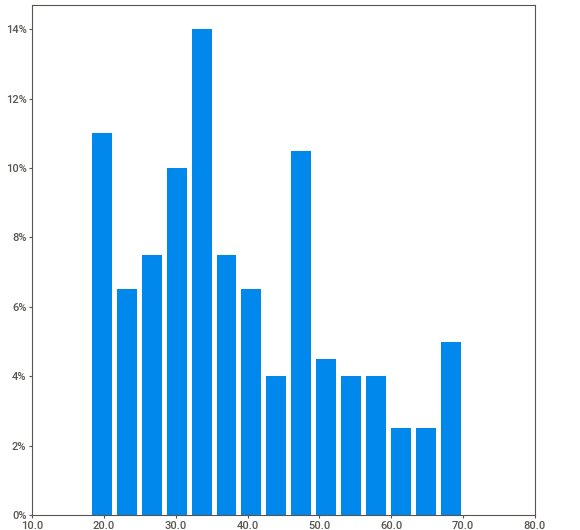
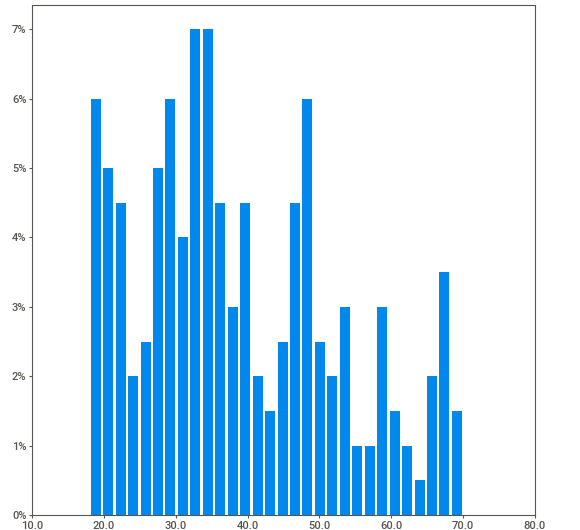
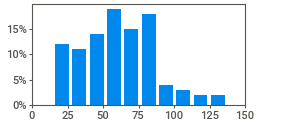
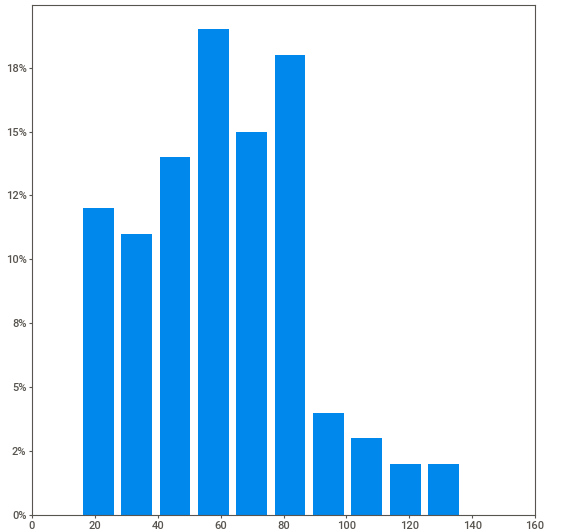
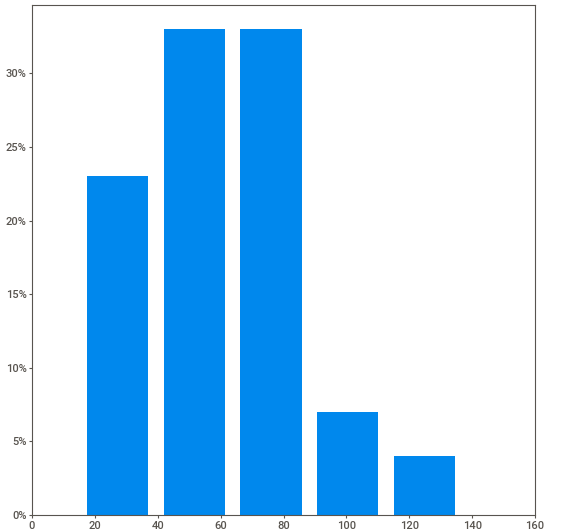
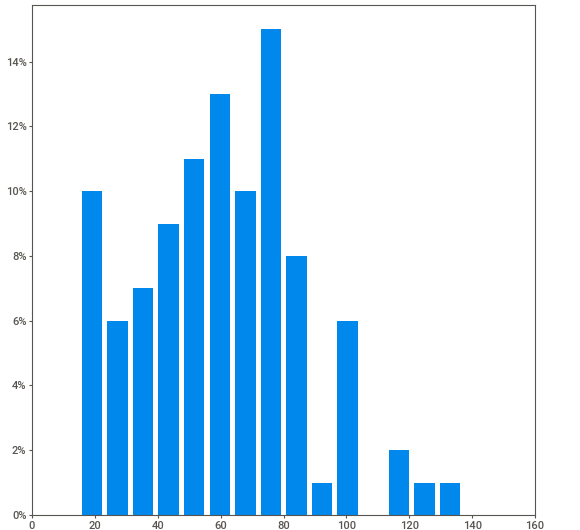
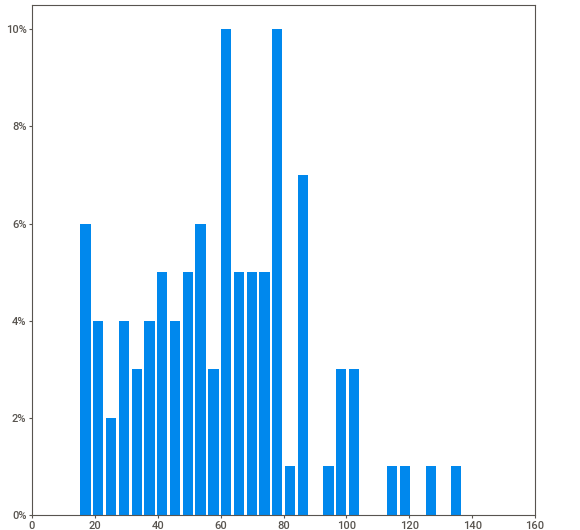
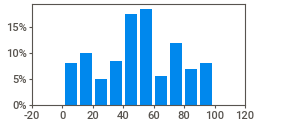
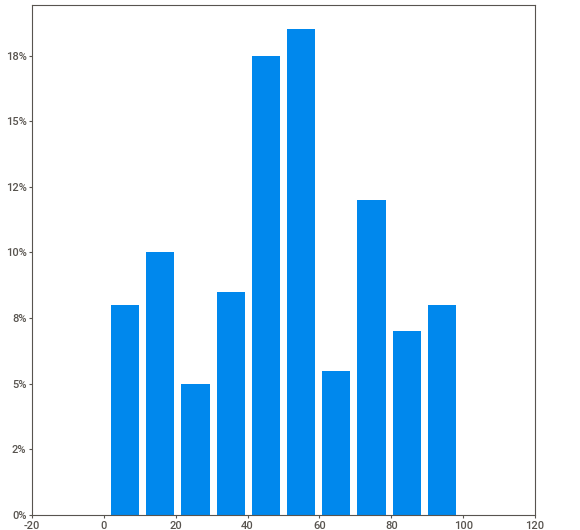
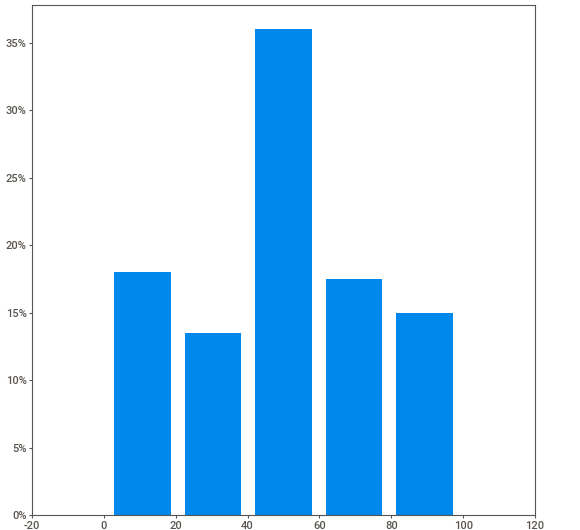
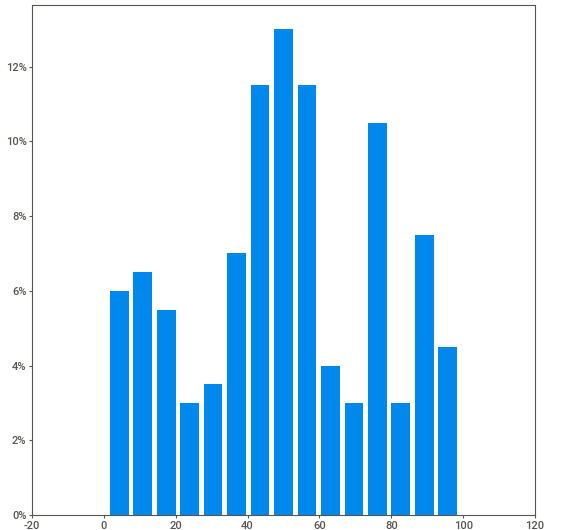
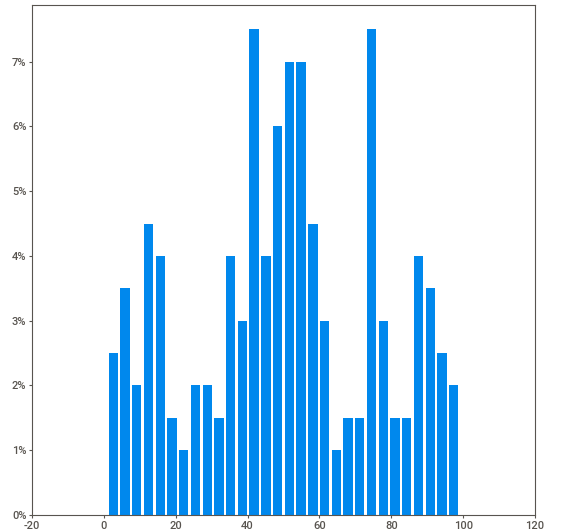
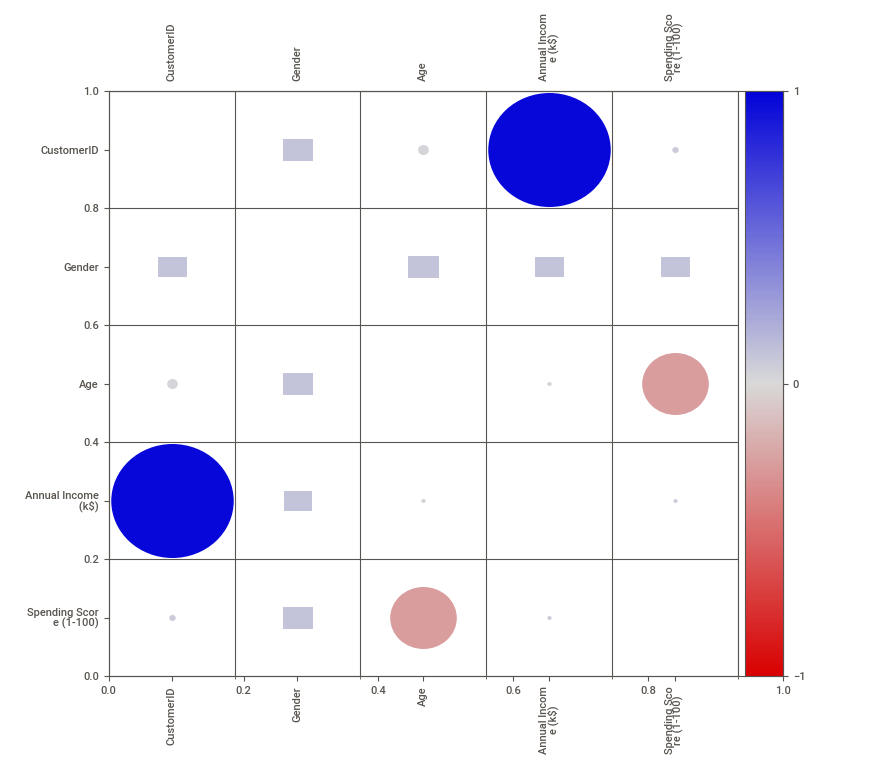
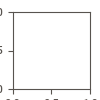

In [3]:
import sweetviz as sv
report = sv.analyze(mall_dataset).show_notebook()

In [4]:
label_encoder = preprocessing.LabelEncoder() 

mall_dataset['Gender'] = label_encoder.fit_transform(mall_dataset['Gender'])
mall_dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
#To train the DBSCAN model, we need to find the optimal value of epsilon and min samples.
#Let us create a range of epsilon values and min sample size values to be tested.
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

## create all the combinations of eps_values and min_samples
DBSCAN_params = list(product(eps_values, min_samples))

In [7]:
#Calculate the Silhouette score for all the combinations of epsilon and min samples using DBSCAN and find the best parameters.
from sklearn.metrics import silhouette_score

sil_score = []
X = mall_dataset.drop(['CustomerID'], axis=1)

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

## Get the max Silhouette score
max_score = max(sil_score)

## Get the index of max Silhouette score
max_index = sil_score.index(max(sil_score))

## Get the params corresponding to the best score
best_params = DBSCAN_params[max_index]

print(max_score, max_index, best_params)

0.25541229267169685 127 (12.5, 4)


In [10]:
#Finally, apply the DBSCAN method using the best parameters and assign clusters to each data point.
DBS_clustering = DBSCAN(eps=best_params[0], min_samples=best_params[1]).fit(X)

# Assign cluster labels to data points
mall_dataset.loc[:,'cluster'] = DBS_clustering.labels_ 

## Check the cluster counts
mall_dataset['cluster'].value_counts().reset_index()

,cluster,count
0,0,112
1,2,34
2,3,24
3,-1,18
4,1,8
5,4,4


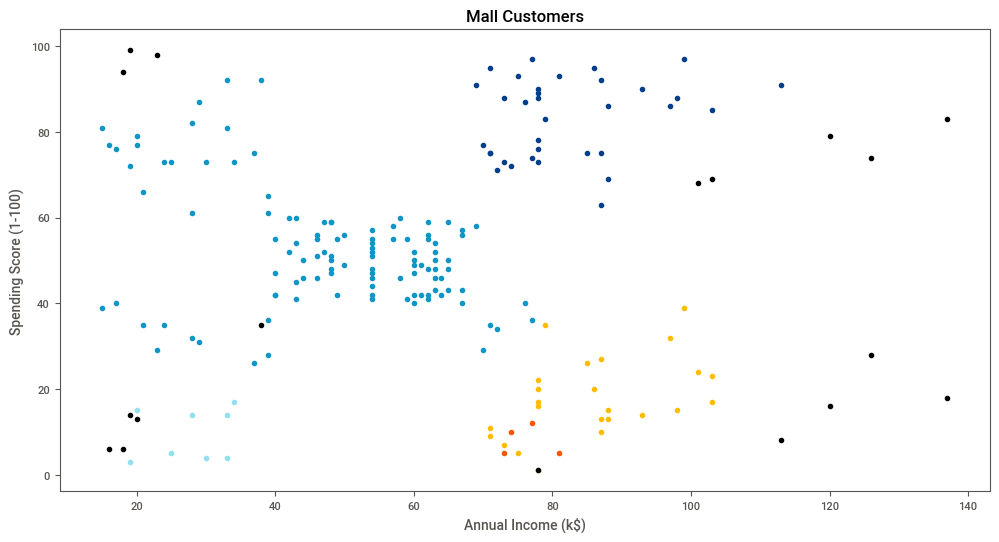

In [11]:
fig = plt.figure(figsize=(12,6))

colors = ["#0f96c7","#90e0ef", "#023e8a","#ffbd00","#ff5400", "#000"]

for r in range(6):
    
    ## replace cluster number 5 with Noise cluster
    if r==5:
        r=-1
    
    clustered_customer = mall_dataset[mall_dataset["cluster"] == r]
    plt.scatter(clustered_customer["Annual Income (k$)"], clustered_customer["Spending Score (1-100)"], color=colors[r])
    
plt.title("Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()